In [1]:
from particle_seg import *
from particle_loader import *
from plots import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import pandas as pd

ratio = 300/68

In [ ]:
# using_colab = True
# if using_colab:
#     import torch
#     import torchvision
#     print("PyTorch version:", torch.__version__)
#     print("Torchvision version:", torchvision.__version__)
#     print("CUDA is available:", torch.cuda.is_available())
#     import sys
#     !{sys.executable} -m pip install opencv-python matplotlib
#     !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

#     !mkdir images
#     !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
        
#     !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [2]:
root = os.getcwd()
save_path = 'results/spheres/'
img_idx='59'

In [3]:
sam_checkpoint = "sam_vit_h_4b8939.pth"

device = "cuda"
model_type = "vit_h"

from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

print('ok')


ok


In [4]:
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=36,
    pred_iou_thresh=0.80,
    stability_score_thresh=0.80,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=350,  # Requires open-cv to run post-processing
)

In [5]:
img_set = Particle_Dataset(root = root,img_idx=img_idx)
print("Analysing",img_set.__len__(),'images')
img_set.files

Analinsando 10 imagens


['GM_59_20.tif',
 'GM_59_21.tif',
 'GM_59_22.tif',
 'GM_59_23.tif',
 'GM_59_24.tif',
 'GM_59_25.tif',
 'GM_59_26.tif',
 'GM_59_27.tif',
 'GM_59_28.tif',
 'GM_59_29.tif']

0/10
Analizing particle: GM_59_20


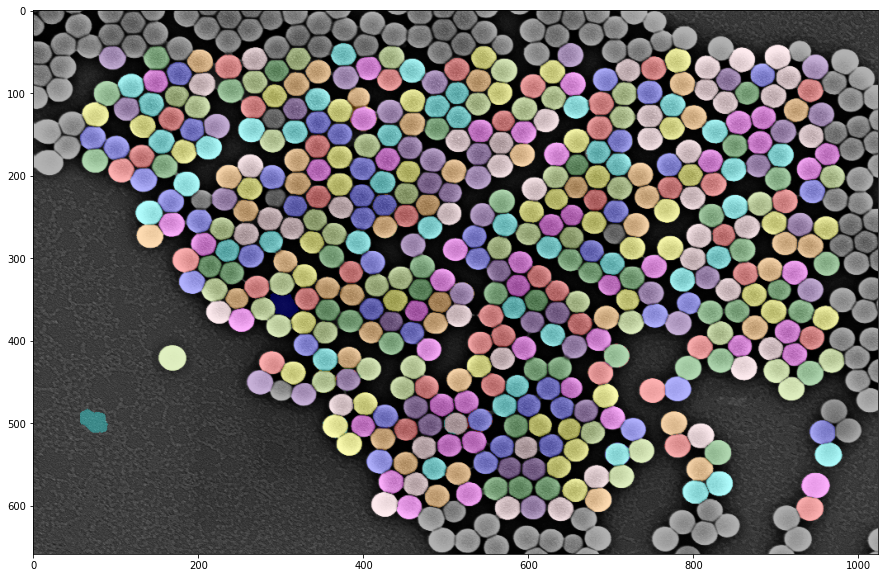

image from GM_59_20 saved!
1/10
Analizing particle: GM_59_21


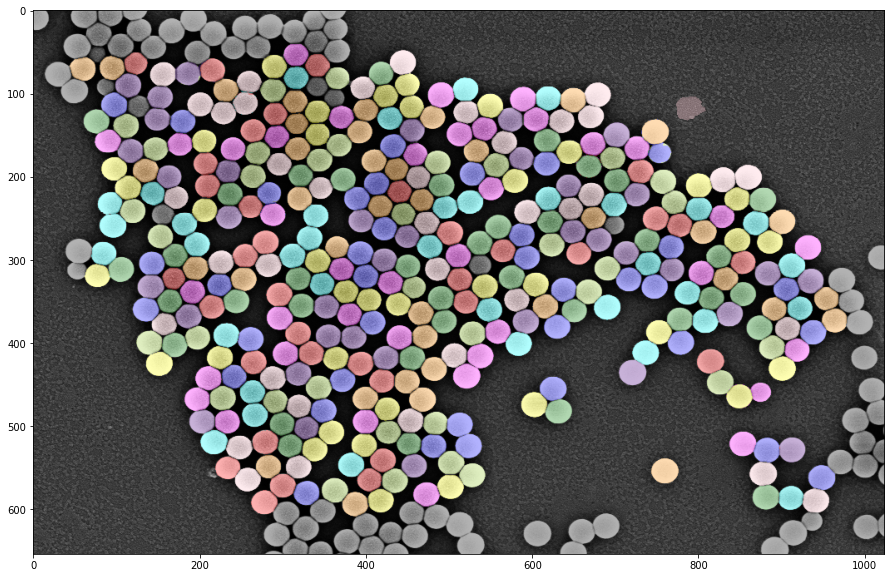

image from GM_59_21 saved!
2/10
Analizing particle: GM_59_22


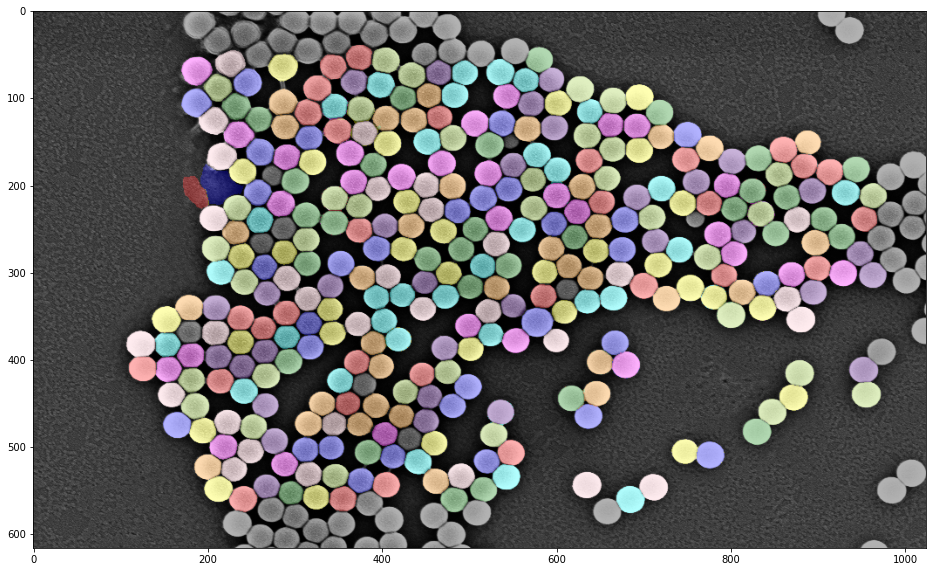

image from GM_59_22 saved!
3/10
Analizing particle: GM_59_23


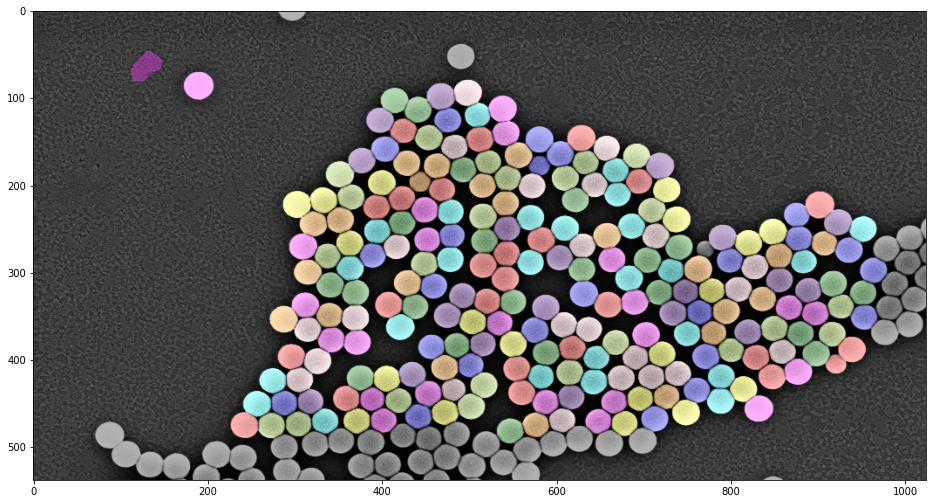

image from GM_59_23 saved!
4/10
Analizing particle: GM_59_24


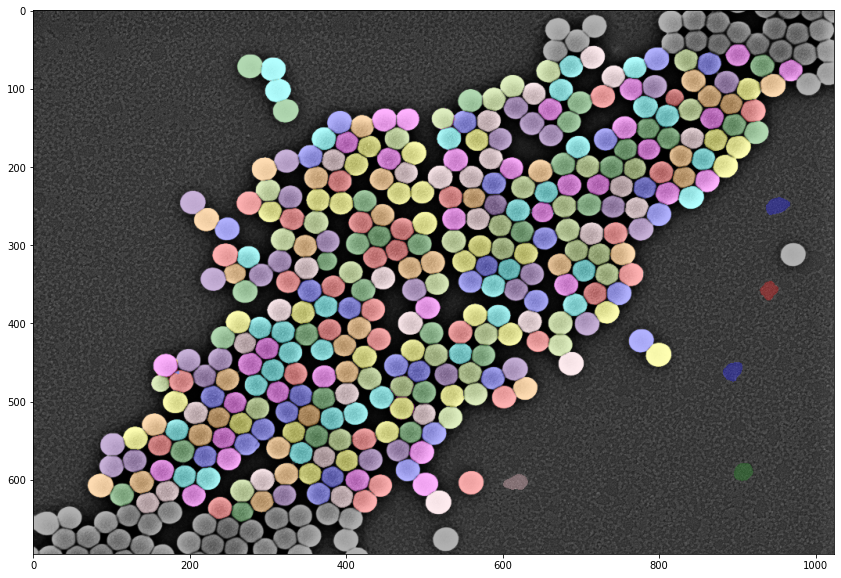

image from GM_59_24 saved!
5/10
Analizing particle: GM_59_25


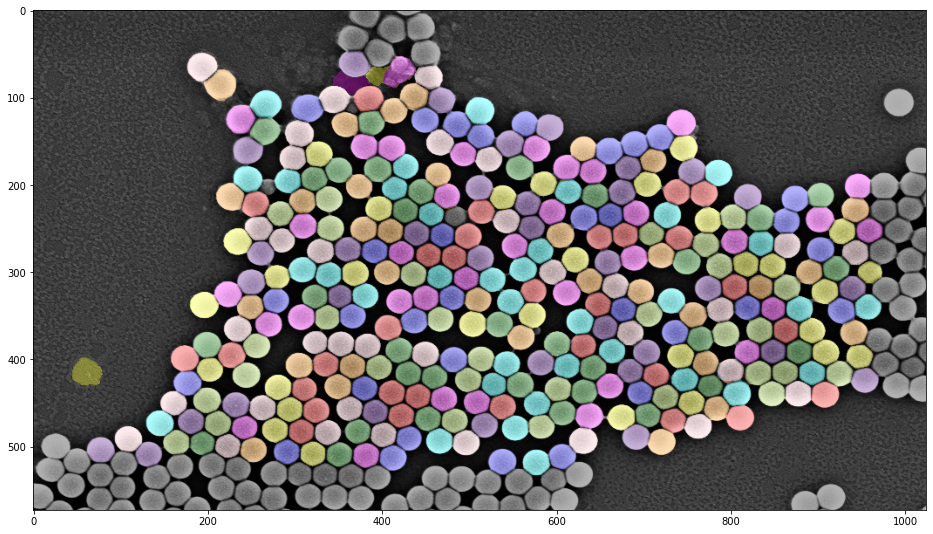

image from GM_59_25 saved!
6/10
Analizing particle: GM_59_26


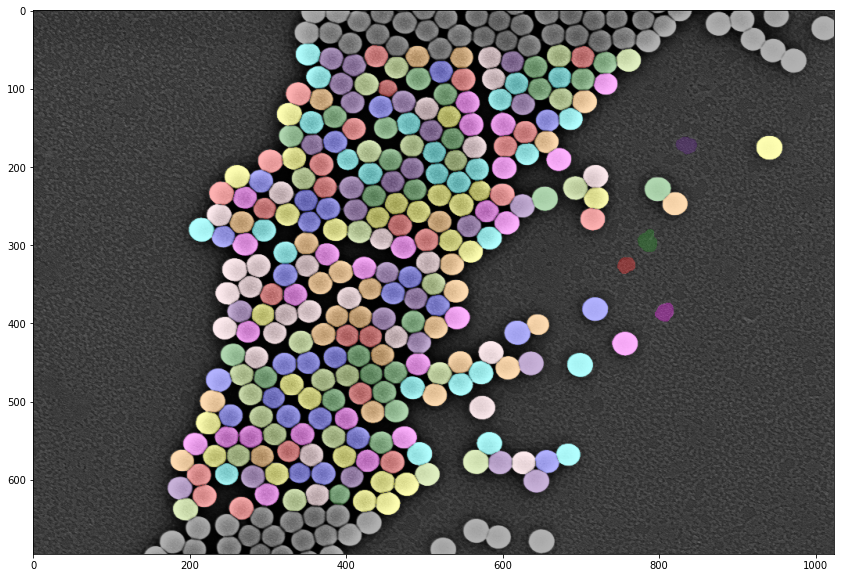

image from GM_59_26 saved!
7/10
Analizing particle: GM_59_27


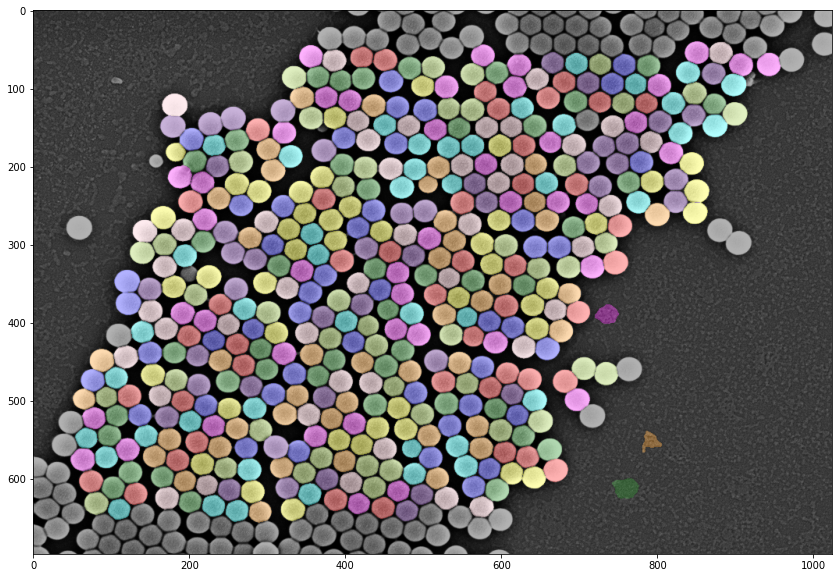

image from GM_59_27 saved!
8/10
Analizing particle: GM_59_28


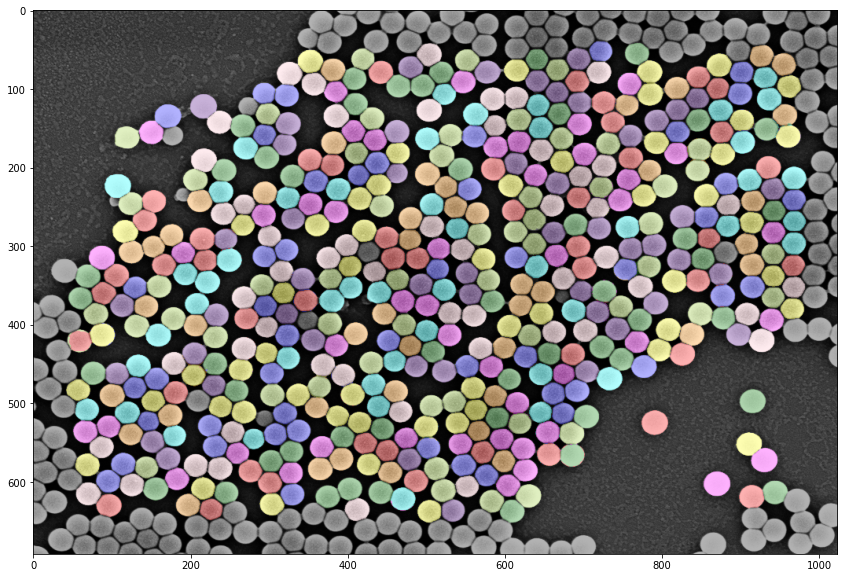

image from GM_59_28 saved!
9/10
Analizing particle: GM_59_29


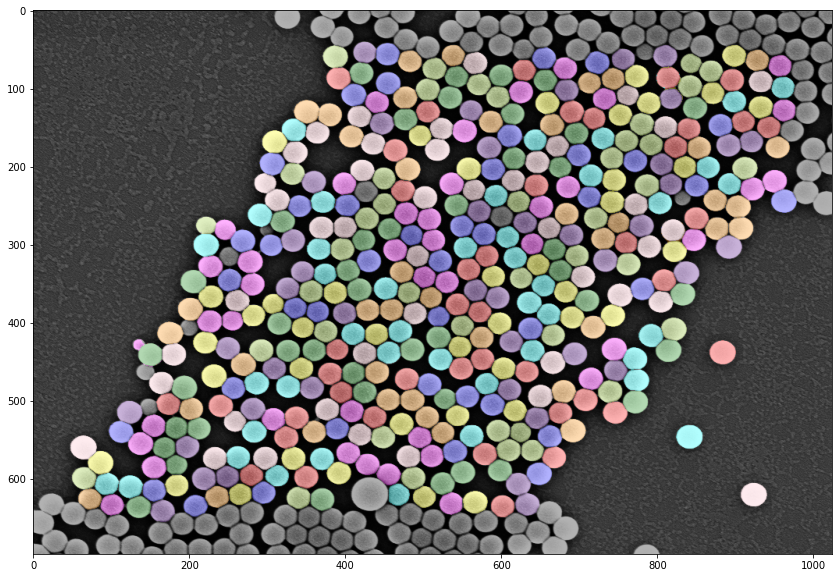

image from GM_59_29 saved!


In [6]:
for idx in range(0,img_set.__len__()):
    
    print(f'{idx}/{img_set.__len__()}')
    
    img, name = img_set.__getitem__(idx)
    saving_name = name.split('.')[0]
    print(f'Analizing particle: {saving_name}')
    
    comined_mask, simple_mask, dataframe_SAM = SAM_analysis(img,mask_generator)
    dataframe_SAM['img_name'] = saving_name
    dataframe_SAM.to_excel(f'{save_path}/df_SAM_orig_{saving_name}.xlsx')
    
    comb_mask = get_cob_mask_from_sam(dataframe_SAM)
    plot_seg_mask(img,comb_mask, save=True,name=saving_name)

    sam_df = label_props_SAM(img,comb_mask)
    sam_df['img_name'] = saving_name
    sam_df.to_excel(f'{save_path}/df_analized_{saving_name}.xlsx')
    
    print(f'image from {saving_name} saved!')

In [3]:

data_path = os.path.join(root,save_path)
files = os.listdir(data_path)
filtered_files = sorted([ f'{save_path}'+r for r in files if  r.split('.')[-1]=='xlsx' ])
filtered_files = sorted([r for r in filtered_files if  r.split('_')[1]=='analized' ])
filtered_files

['results/spheres/df_analized_GM_59_20.xlsx',
 'results/spheres/df_analized_GM_59_21.xlsx',
 'results/spheres/df_analized_GM_59_22.xlsx',
 'results/spheres/df_analized_GM_59_23.xlsx',
 'results/spheres/df_analized_GM_59_24.xlsx',
 'results/spheres/df_analized_GM_59_25.xlsx',
 'results/spheres/df_analized_GM_59_26.xlsx',
 'results/spheres/df_analized_GM_59_27.xlsx',
 'results/spheres/df_analized_GM_59_28.xlsx',
 'results/spheres/df_analized_GM_59_29.xlsx']

In [4]:
init = True
for file in filtered_files:
    df_temp = pd.read_excel(file)
    if init:
        df_concat = df_temp.copy()
        init=False
    else:
        df_concat = pd.concat([df_concat,df_temp])
df_concat.to_excel(f'{save_path}/results_for_idx_{img_idx}.xlsx')

In [5]:
df_concat

Unnamed: 0  area  convex_area                            mean_intensity  \
0             0   690          703  [200.66811594 200.66811594 200.66811594]   
1             1   661          674  [175.59001513 175.59001513 175.59001513]   
2             2   701          713  [199.31954351 199.31954351 199.31954351]   
3             3   612          624  [174.52614379 174.52614379 174.52614379]   
4             4   662          677  [170.90634441 170.90634441 170.90634441]   
..          ...   ...          ...                                       ...   
370         370   654          681  [190.82415902 190.82415902 190.82415902]   
371         371   716          745  [215.21787709 215.21787709 215.21787709]   
372         372   667          694  [168.81409295 168.81409295 168.81409295]   
373         373   617          642  [168.71312804 168.71312804 168.71312804]   
374         374   682          711  [230.41935484 230.41935484 230.41935484]   

     label  perimeter                                  centroid  \
0      646  94.426407    (564.9898550724638, 682.5405797101449)   
1      410  92.426407    (422.9031770045386, 353.6626323751891)   
2      165  95.254834   (202.52353780313837, 538.9985734664765)   
3      232  89.012193               (262.33986928104576, 426.0)   
4      275  92.669048  (298.21148036253777, 361.61480362537765)   
..     ...        ...                                       ...   
370     24  95.012193    (86.34862385321101, 813.5107033639143)   
371    196  99.497475   (295.3743016759777, 268.68435754189943)   
372    396  96.083261    (522.4197901049475, 645.4002998500749)   
373     78  92.426407    (138.3095623987034, 718.7196110210697)   
374    406  97.497475   (540.1217008797654, 112.19794721407625)   

     axis_major_length  feret_diameter_max  orientation  solidity  \
0            31.054166           32.310989     1.544874  0.981508   
1            30.452099           31.622777     1.551263  0.980712   
2            31.128171           32.280025     1.540914  0.983170   
3            29.255909           30.364453    -1.485585  0.980769   
4            30.471843           31.953091     1.341118  0.977843   
..                 ...                 ...          ...       ...   
370          30.116093           31.048349    -1.555442  0.960352   
371          31.760310           32.984845    -1.489697  0.961074   
372          30.815387           32.140317    -1.513079  0.961095   
373          28.775804           29.832868     1.370246  0.961059   
374          31.348795           32.756679     1.370659  0.959212   

     eccentricity                  bbox  circularity  img_name  
0        0.410730  (551, 668, 579, 698)     0.972461  GM_59_20  
1        0.419103  (410, 339, 437, 369)     0.972342  GM_59_20  
2        0.387652  (189, 524, 217, 555)     0.970854  GM_59_20  
3        0.413203  (250, 412, 276, 441)     0.970649  GM_59_20  
4        0.418821  (285, 347, 313, 377)     0.968720  GM_59_20  
..            ...                   ...          ...       ...  
370      0.391960   (73, 799, 101, 829)     0.910393  GM_59_29  
371      0.424698  (281, 253, 311, 285)     0.908864  GM_59_29  
372      0.442847  (509, 630, 537, 662)     0.907905  GM_59_29  
373      0.309096  (125, 705, 153, 734)     0.907618  GM_59_29  
374      0.463262   (526, 97, 555, 129)     0.901587  GM_59_29  

[3259 rows x 15 columns]